In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import precision_recall_curve, precision_score, recall_score

In [3]:
import re, sys, os

from linecache import getline
from pathlib import Path

sys.path.append(str(Path(os.getcwd()).parent) + '\py')
print(os.getcwd())

C:\Users\BigBadBraddy\Desktop\UCD\FYP\fyp-braddy\COMP30910\Solver\Modules\ipynb


In [4]:
import Constants as c

In [5]:
cvrp = pd.read_csv('../../Data/data.csv', index_col=0)
cvrp

,U_NODE_ID,V_NODE_ID,U_X,U_Y,V_X,V_Y,IS_DEPOT,IS_OPTIMAL_EDGE,EDGE_WEIGHT,GLOBAL_RANK,...,LP_RELAXATION,FILE_NAME,U_NODE_DEMAND,V_NODE_DEMAND,CAPACITY,NUM_OF_VEHICLES,U_NODE_DEMAND_CAPACITY_RATIO,V_NODE_DEMAND_CAPACITY_RATIO,REDUCED_COST,MST_WEIGHT
0,1,2,82,76,96,44,0.032258,0,1.126726,11.354839,...,0.0,A-n32-k5.txt,0.000000,0.612903,3.225806,0.161290,0.000000,0.006129,0.791969,1.126726
1,1,3,82,76,50,5,0.032258,0,2.512197,4.387097,...,0.0,A-n32-k5.txt,0.000000,0.677419,3.225806,0.161290,0.000000,0.006774,2.272961,2.512197
2,1,4,82,76,49,8,0.032258,0,2.438206,4.774194,...,0.0,A-n32-k5.txt,0.000000,0.193548,3.225806,0.161290,0.000000,0.001935,2.259396,2.438206
3,1,5,82,76,13,7,0.032258,0,3.147766,1.193548,...,0.0,A-n32-k5.txt,0.000000,0.612903,3.225806,0.161290,0.000000,0.006129,2.810831,3.147766
4,1,6,82,76,29,89,0.032258,1,1.760357,8.419355,...,0.0,A-n32-k5.txt,0.000000,0.225806,3.225806,0.161290,0.000000,0.002258,1.163771,1.760357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46186,57,59,6,25,40,60,0.000000,0,0.827042,3.457627,...,0.0,P-n60-k10.txt,0.440678,0.355932,2.033898,0.016949,0.003672,0.002966,0.605286,0.827042
46187,57,60,6,25,50,4,0.000000,0,0.826347,3.474576,...,0.0,P-n60-k10.txt,0.440678,0.406780,2.033898,0.016949,0.003672,0.003390,0.571003,0.826347
46188,58,59,65,27,40,60,0.000000,0,0.701703,5.644068,...,0.0,P-n60-k10.txt,0.237288,0.355932,2.033898,0.016949,0.001977,0.002966,0.521989,0.701703
46189,58,60,65,27,50,4,0.000000,0,0.465408,9.440678,...,0.0,P-n60-k10.txt,0.237288,0.406780,2.033898,0.016949,0.001977,0.003390,0.252106,0.465408


In [6]:
cvrp.pop(c.U_NODE_ID)
cvrp.pop(c.V_NODE_ID)
cvrp.pop(c.U_Y)
cvrp.pop(c.U_X)
cvrp.pop(c.V_X)
cvrp.pop(c.V_Y)

0        44
1         5
2         8
3         7
4        89
         ..
46186    60
46187     4
46188    60
46189     4
46190     4
Name: V_Y, Length: 46191, dtype: int64

In [7]:
cvrp['FILE_NAME'].nunique()

29

In [8]:
file_names = cvrp['FILE_NAME'].unique()
count = len(file_names)

idx_training = round(count * 2/3) - 1
training_file_name = file_names[idx_training]
training_ratio = cvrp.index[cvrp['FILE_NAME'] == training_file_name].tolist()[0]
file_names = file_names[idx_training + 1:]

idx_validation = round(count * 0.16666666666) - 1
validation_file_name = file_names[idx_validation]
validation_ratio = cvrp.index[cvrp['FILE_NAME'] == validation_file_name].tolist()[0]



In [9]:
train, validate, test = np.split(cvrp, [int(training_ratio), int(validation_ratio)])

In [10]:
# print(train)
file_names = train['FILE_NAME'].unique()
print(file_names)
train.pop('FILE_NAME')

['A-n32-k5.txt' 'E-n101-k14.txt' 'E-n101-k8.txt' 'E-n30-k3.txt'
 'E-n33-k4.txt' 'E-n51-k5.txt' 'E-n76-k10.txt' 'E-n76-k14.txt'
 'E-n76-k7.txt' 'E-n76-k8.txt' 'F-n72-k4.txt' 'M-n101-k10.txt'
 'P-n16-k8.txt' 'P-n19-k2.txt' 'P-n20-k2.txt' 'P-n21-k2.txt'
 'P-n22-k2.txt' 'P-n22-k8.txt']


0        A-n32-k5.txt
1        A-n32-k5.txt
2        A-n32-k5.txt
3        A-n32-k5.txt
4        A-n32-k5.txt
             ...     
32988    P-n22-k8.txt
32989    P-n22-k8.txt
32990    P-n22-k8.txt
32991    P-n22-k8.txt
32992    P-n22-k8.txt
Name: FILE_NAME, Length: 32993, dtype: object

In [11]:
# print(validate)
file_names = validate['FILE_NAME'].unique()
print(file_names)
validate.pop('FILE_NAME')

['P-n23-k8.txt' 'P-n40-k5.txt' 'P-n45-k5.txt' 'P-n50-k10.txt'
 'P-n50-k7.txt']


32993    P-n23-k8.txt
32994    P-n23-k8.txt
32995    P-n23-k8.txt
32996    P-n23-k8.txt
32997    P-n23-k8.txt
             ...     
37461    P-n50-k7.txt
37462    P-n50-k7.txt
37463    P-n50-k7.txt
37464    P-n50-k7.txt
37465    P-n50-k7.txt
Name: FILE_NAME, Length: 4473, dtype: object

In [12]:
# print(test)
file_names = test['FILE_NAME'].unique()
print(file_names)
test.pop('FILE_NAME')

['P-n50-k8.txt' 'P-n51-k10.txt' 'P-n55-k10.txt' 'P-n55-k15.txt'
 'P-n55-k7.txt' 'P-n60-k10.txt']


37466     P-n50-k8.txt
37467     P-n50-k8.txt
37468     P-n50-k8.txt
37469     P-n50-k8.txt
37470     P-n50-k8.txt
             ...      
46186    P-n60-k10.txt
46187    P-n60-k10.txt
46188    P-n60-k10.txt
46189    P-n60-k10.txt
46190    P-n60-k10.txt
Name: FILE_NAME, Length: 8725, dtype: object

In [13]:
cvrp.pop('FILE_NAME')

0         A-n32-k5.txt
1         A-n32-k5.txt
2         A-n32-k5.txt
3         A-n32-k5.txt
4         A-n32-k5.txt
             ...      
46186    P-n60-k10.txt
46187    P-n60-k10.txt
46188    P-n60-k10.txt
46189    P-n60-k10.txt
46190    P-n60-k10.txt
Name: FILE_NAME, Length: 46191, dtype: object

In [14]:
y_train = train.pop('IS_OPTIMAL_EDGE')
X_train = train.values

y_val = validate.pop('IS_OPTIMAL_EDGE')
X_val = validate.values

y_test = test.pop('IS_OPTIMAL_EDGE')
X_test = test.values

cvrp.pop('IS_OPTIMAL_EDGE')

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

# RandomForest

In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
feat_labels = list(cvrp.columns)
for feature in sorted(zip(feat_labels, clf.feature_importances_)):
    print(feature)
    
sfm = SelectFromModel(clf)

sfm.fit(X_train, y_train)
print()
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])
    
X_important_train = sfm.transform(X_train)
X_important_val = sfm.transform(X_val)
X_important_test = sfm.transform(X_test)



('AVERAGE_NODE_DEGREE', 0.0)
('CAPACITY', 0.02259267341825005)
('EDGE_WEIGHT', 0.09516706733114362)
('GLOBAL_RANK', 0.09978493318350071)
('IS_DEPOT', 0.011029693908407946)
('IS_MST_EDGE', 0.012513066498163937)
('LP_RELAXATION', 0.011578966955402102)
('MST_U_DEGREE', 0.019252984099485386)
('MST_V_DEGREE', 0.008319689968393273)
('MST_WEIGHT', 0.09601649134614339)
('NUM_OF_VEHICLES', 0.019416186381816088)
('REDUCED_COST', 0.10691071162849895)
('U_NODE_DEGREE', 0.0)
('U_NODE_DEMAND', 0.05624767145757378)
('U_NODE_DEMAND_CAPACITY_RATIO', 0.06519184601896869)
('U_NODE_LOCAL_EDGE_RANK', 0.1068773825146536)
('V_NODE_DEGREE', 0.0)
('V_NODE_DEMAND', 0.07071358630858576)
('V_NODE_DEMAND_CAPACITY_RATIO', 0.0784305466481397)
('V_NODE_LOCAL_EDGE_RANK', 0.11995650233287314)

EDGE_WEIGHT
GLOBAL_RANK
U_NODE_LOCAL_EDGE_RANK
V_NODE_LOCAL_EDGE_RANK
U_NODE_DEMAND
V_NODE_DEMAND
U_NODE_DEMAND_CAPACITY_RATIO
V_NODE_DEMAND_CAPACITY_RATIO
REDUCED_COST
MST_WEIGHT


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\users\bigbadbraddy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

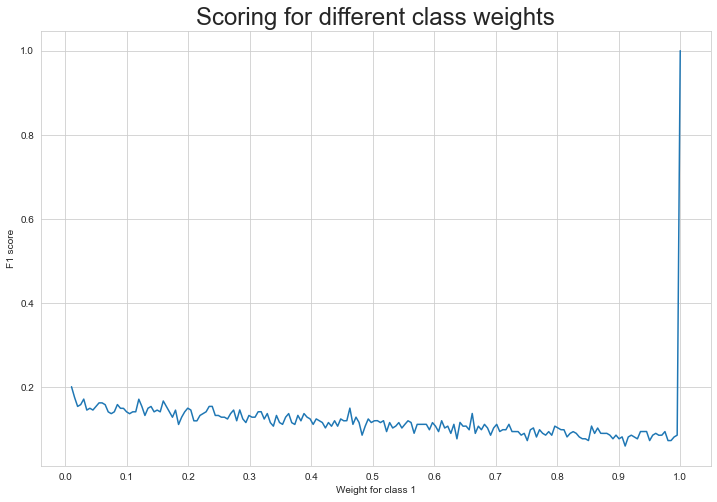

In [16]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = RandomForestClassifier()

lr.fit(X_important_train, y_train)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator = lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='recall', 
                          verbose=2).fit(X_important_val, y_val)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [17]:
# model, features = train_model(RandomForestClassifier(class_weight={0: 0, 1: 1}))
clf_important = RandomForestClassifier(class_weight='balanced')
clf_important.fit(X_important_train, y_train)



RandomForestClassifier(class_weight='balanced')

In [18]:
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
print(recall_score(y_test, y_pred))

y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
print(recall_score(y_test, y_important_pred))

0.11796246648793565
0.013404825737265416


In [19]:
decision_function = clf_important.predict_proba(X_important_test)[:,1]

In [20]:
start = 0
step = 0.1
thresholds = [start + (x * step) for x in range(0, 11)]

def calc_recall_ratio_ground_truth_count(decision_function, y):
    ground_truth_count = []
    recall = []
    ratios = []

    for t in thresholds:   
        # Set the value of decision threshold. 
        decision_threshold = t

        # Desired prediction to increase precision value. 
        desired_predict = [] 

        for i in decision_function: 
            if i < decision_threshold: 
                desired_predict.append(0) 
            else: 
                desired_predict.append(1) 

        count = 0
        for e in desired_predict:
            if e == 1:
                count += 1

        ratio = count / len(desired_predict)
        prune_ratio = 1 - ratio
        non_pruning_ratio = 1 - prune_ratio   
        
        ratios.append(non_pruning_ratio)
        ground_truth_count.append(count)  
        recall.append(recall_score(y, desired_predict))
        
    return recall, ratios, ground_truth_count

def plot_recall_threshold_ground_truth(recall, ground_truth_count):        
    plt.rcParams["figure.figsize"] = [16, 9]
    fig, host = plt.subplots()
    fig.subplots_adjust(right=0.75)

    par1 = host.twinx()

    p1, = host.plot(thresholds, recall, "b-", label="Recall")
    p2, = par1.plot(thresholds, ground_truth_count, "r-", label="Ground Truth Count")

    plt.xticks(np.arange(0, 1.1, 0.1))

    host.set_xlim(0, 1)
    host.set_ylim(0, 1)

    host.set_xlabel("Threshold")
    host.set_ylabel("Recall")
    par1.set_ylabel("Ground Truth Count")

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())

    host.set_title('Threshold vs Recall and Ground Truth Count')

    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), **tkw)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)

    lines = [p1, p2]

    host.legend(lines, [l.get_label() for l in lines])
    
def plot_ratio_recall(ratio, recall):
    plt.rcParams["figure.figsize"] = [16, 9]
    plt.figure()
    plt.plot(ratio, recall, c ='b') 
    plt.xlabel("Recall")
    plt.ylabel("Non-Pruning Ratio")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title('Non-Pruning Ratio vs Recall')
    plt.show() 

In [21]:
recall, ratio, ground_truth_count = calc_recall_ratio_ground_truth_count(decision_function, y_test)


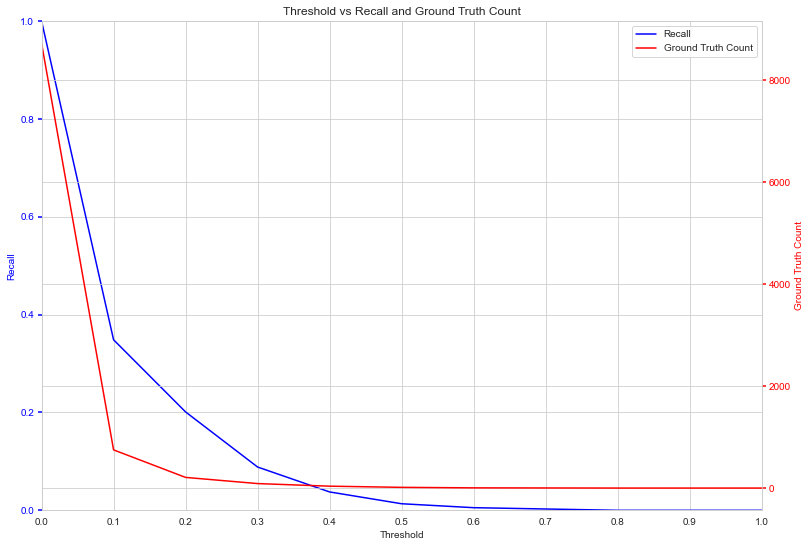

In [22]:
plot_recall_threshold_ground_truth(recall, ground_truth_count)


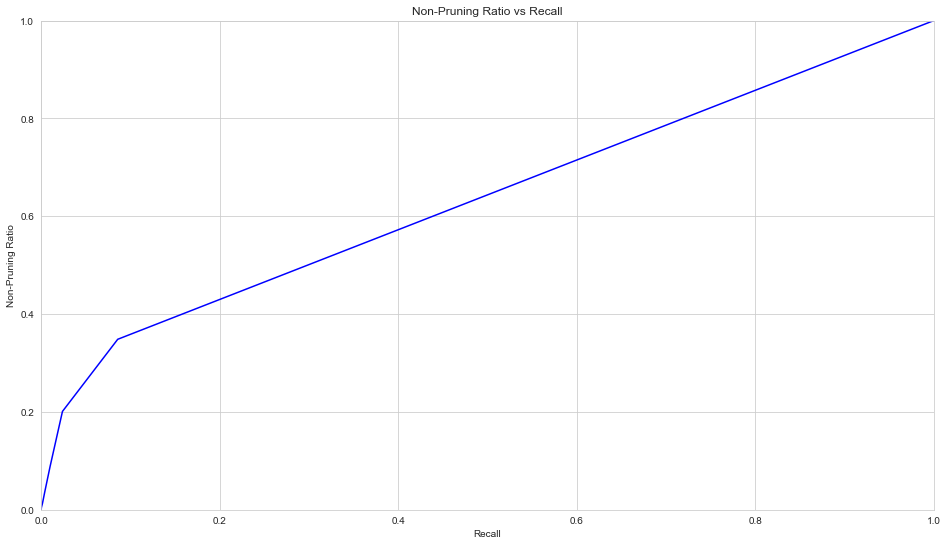

In [23]:
plot_ratio_recall(ratio, recall)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [25]:
logreg = LogisticRegression(solver='newton-cg', max_iter=5000)
selector = RFECV(logreg, step=1, cv=10, n_jobs=-1, verbose=1, scoring='recall')

In [26]:
selector = selector.fit(X_train, y_train)

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


In [27]:
for feature_list_index in selector.get_support(indices=True):
    print(feat_labels[feature_list_index])
    
X_important_train = selector.transform(X_train)
X_important_val = selector.transform(X_val)
X_important_test = selector.transform(X_test)


GLOBAL_RANK
MST_U_DEGREE
MST_V_DEGREE


In [28]:
c_values = [100, 10, 1.0, 0.1, 0.01]
intercept = [True, False]
weight = ['balanced', None]

logreg = LogisticRegression(solver='newton-cg', max_iter=5000)
logreg.fit(X_important_train, y_train)
# define grid search
grid = dict(C=c_values, fit_intercept=intercept, class_weight=weight)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=10, scoring='recall', error_score=0)
grid_result = grid_search.fit(X_important_val, y_val)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.396014 using {'C': 0.01, 'class_weight': 'balanced', 'fit_intercept': False}
0.366848 (0.357213) with: {'C': 100, 'class_weight': 'balanced', 'fit_intercept': True}
0.366848 (0.357213) with: {'C': 100, 'class_weight': 'balanced', 'fit_intercept': False}
0.100000 (0.300000) with: {'C': 100, 'class_weight': None, 'fit_intercept': True}
0.021377 (0.028904) with: {'C': 100, 'class_weight': None, 'fit_intercept': False}
0.366848 (0.357213) with: {'C': 10, 'class_weight': 'balanced', 'fit_intercept': True}
0.366848 (0.357213) with: {'C': 10, 'class_weight': 'balanced', 'fit_intercept': False}
0.100000 (0.300000) with: {'C': 10, 'class_weight': None, 'fit_intercept': True}
0.021377 (0.028904) with: {'C': 10, 'class_weight': None, 'fit_intercept': False}
0.366848 (0.357213) with: {'C': 1.0, 'class_weight': 'balanced', 'fit_intercept': True}
0.366848 (0.357213) with: {'C': 1.0, 'class_weight': 'balanced', 'fit_intercept': False}
0.062500 (0.187500) with: {'C': 1.0, 'class_weight': None,

In [29]:
clf_important = LogisticRegression(solver='newton-cg', max_iter=5000, C=grid_result.best_params_['C'], class_weight=grid_result.best_params_['class_weight'], fit_intercept=grid_result.best_params_['fit_intercept'])
clf_important.fit(X_important_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', fit_intercept=False,
                   max_iter=5000, solver='newton-cg')

In [30]:
y_pred = selector.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
print(recall_score(y_test, y_pred))

y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
print(recall_score(y_test, y_important_pred))


0.09919571045576407
0.871313672922252


In [31]:
decision_function = clf_important.decision_function(X_important_test) 

In [32]:
recall, ratio, ground_truth_count = calc_recall_ratio_ground_truth_count(decision_function, y_test)

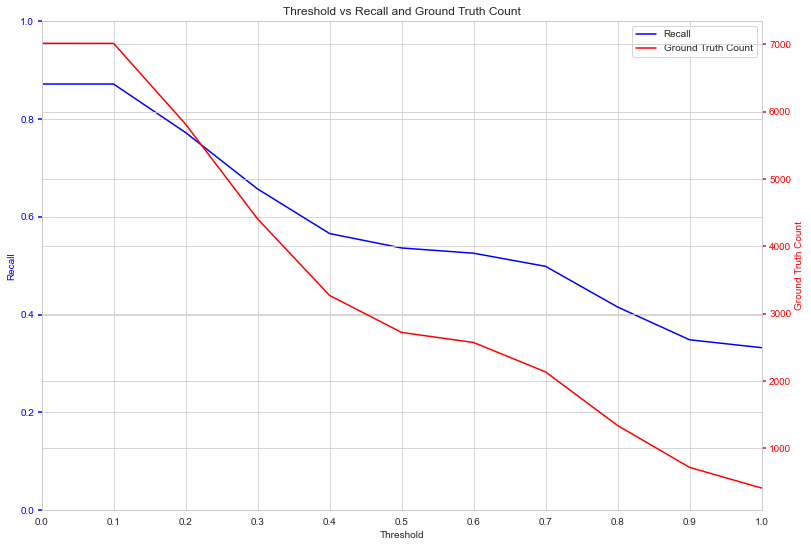

In [33]:
plot_recall_threshold_ground_truth(recall, ground_truth_count)

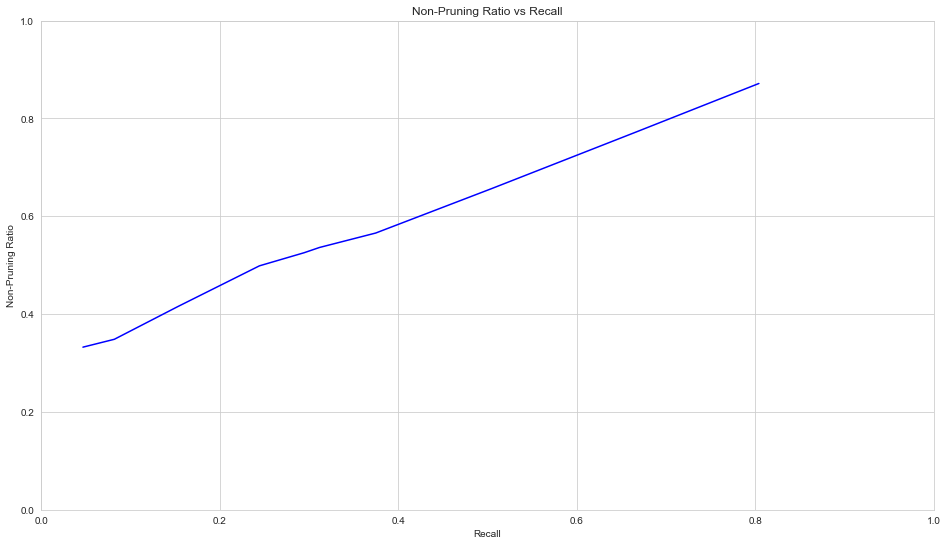

In [34]:
plot_ratio_recall(ratio, recall)

# Naiive Bayes

In [35]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
i_scores = mutual_info_classif(X_train, y_train)

X_train_df = pd.DataFrame(data=X_train, columns=list(cvrp.columns))
X_train_df

FS_DF = pd.DataFrame(i_scores, index = X_train_df.columns, columns = ['I-Gain'])
FS_DF.sort_values(by=['I-Gain'], ascending=False, inplace=True)
FS_DF

,I-Gain
REDUCED_COST,0.023364
V_NODE_LOCAL_EDGE_RANK,0.023129
U_NODE_LOCAL_EDGE_RANK,0.021270
EDGE_WEIGHT,0.019242
MST_WEIGHT,0.018864
GLOBAL_RANK,0.018292
MST_U_DEGREE,0.013243
U_NODE_DEMAND,0.012217
IS_DEPOT,0.011989
IS_MST_EDGE,0.009965


In [36]:
from sklearn.naive_bayes import GaussianNB
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import Pipeline

gnb = GaussianNB()

In [37]:
sbs = SFS(gnb, 
          k_features=3, 
          forward=False, 
          floating=False, 
          scoring='recall',
          cv=10,
          n_jobs=-1)
sbs = sbs.fit(X_train, y_train)

In [38]:
pipe = Pipeline([('sfs', sbs), 
                 ('gnb', gnb)])

param_grid = [
  {'sfs__k_features': [x for x in range(1, len(cvrp.columns) + 1)]
    }
  ]

gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='recall', 
                  n_jobs=-1, 
                  cv=10,
                  refit=False)

# run gridearch
gs = gs.fit(X_train, y_train)

In [39]:
for i in range(len(gs.cv_results_['params'])):
    print(gs.cv_results_['params'][i], 'test acc.:', gs.cv_results_['mean_test_score'][i])

{'sfs__k_features': 1} test acc.: 0.24150650359153558
{'sfs__k_features': 2} test acc.: 0.320918268297418
{'sfs__k_features': 3} test acc.: 0.320918268297418
{'sfs__k_features': 4} test acc.: 0.35229081731702583
{'sfs__k_features': 5} test acc.: 0.3493593476994758
{'sfs__k_features': 6} test acc.: 0.3640749369054553
{'sfs__k_features': 7} test acc.: 0.3650650359153563
{'sfs__k_features': 8} test acc.: 0.3680062123859445
{'sfs__k_features': 9} test acc.: 0.36996699669967
{'sfs__k_features': 10} test acc.: 0.36996699669967
{'sfs__k_features': 11} test acc.: 0.368976897689769
{'sfs__k_features': 12} test acc.: 0.368976897689769
{'sfs__k_features': 13} test acc.: 0.36995728984663173
{'sfs__k_features': 14} test acc.: 0.36995728984663173
{'sfs__k_features': 15} test acc.: 0.36995728984663173
{'sfs__k_features': 16} test acc.: 0.3709376820034945
{'sfs__k_features': 17} test acc.: 0.36995728984663173
{'sfs__k_features': 18} test acc.: 0.36996699669967
{'sfs__k_features': 19} test acc.: 0.3670

In [40]:
print("Best parameters via GridSearch", gs.best_params_)

Best parameters via GridSearch {'sfs__k_features': 16}


In [41]:
sbs = SFS(gnb, 
          k_features=gs.best_params_['sfs__k_features'], 
          forward=False, 
          floating=False, 
          scoring='recall',
          cv=10,
          n_jobs=-1)
sbs = sbs.fit(X_train, y_train)

In [42]:
for feature_list_index in sbs.k_feature_names_:
    print(feat_labels[int(feature_list_index)])
    
X_important_train = sbs.transform(X_train)
X_important_val = sbs.transform(X_val)
X_important_test = sbs.transform(X_test)

EDGE_WEIGHT
GLOBAL_RANK
U_NODE_LOCAL_EDGE_RANK
V_NODE_LOCAL_EDGE_RANK
U_NODE_DEGREE
V_NODE_DEGREE
AVERAGE_NODE_DEGREE
MST_U_DEGREE
MST_V_DEGREE
LP_RELAXATION
U_NODE_DEMAND
V_NODE_DEMAND
CAPACITY
NUM_OF_VEHICLES
V_NODE_DEMAND_CAPACITY_RATIO
MST_WEIGHT


In [43]:
gnb_test = GaussianNB()
gnb_test.fit(X_train, y_train)
y_pred_test = gnb_test.predict(X_test)

gnb.fit(X_important_train, y_train)
y_pred = gnb.predict(X_important_test)

# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 4.71 %


In [44]:
print(recall_score(y_test, y_pred))

print(recall_score(y_test, y_pred_test))

0.9946380697050938
0.9973190348525469


In [45]:
decision_function = gnb.predict_proba(X_important_test)[:,1]

In [46]:
recall, ratio, ground_truth_count = calc_recall_ratio_ground_truth_count(decision_function, y_test)

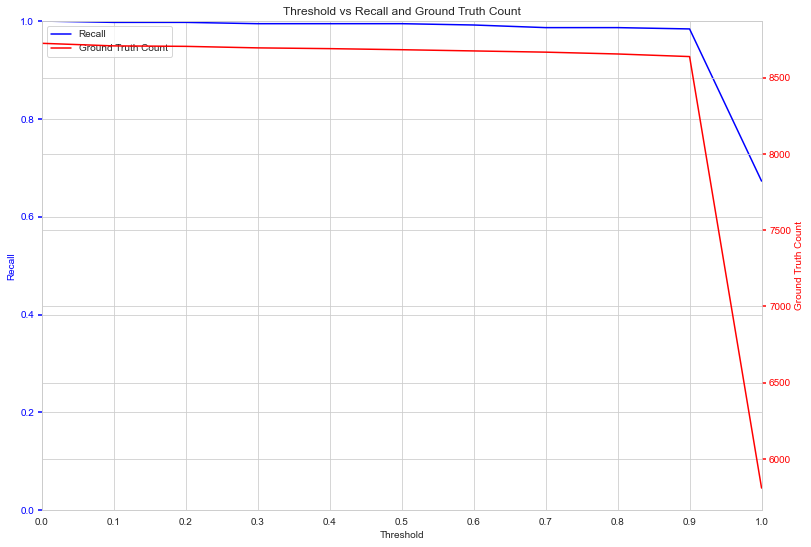

In [47]:
plot_recall_threshold_ground_truth(recall, ground_truth_count)

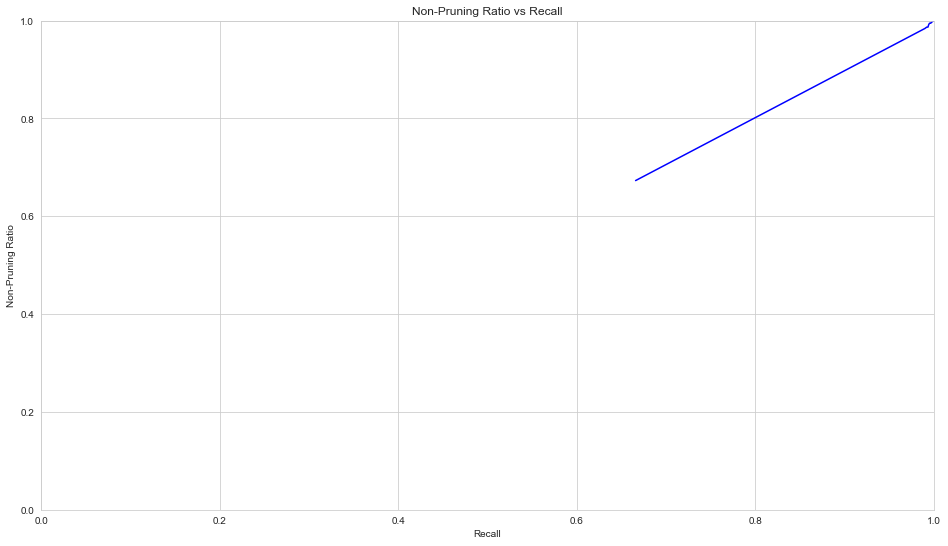

In [48]:
plot_ratio_recall(ratio, recall)

# Prune

In [62]:
df_prune = pd.read_csv('../../Data/data_prune.csv', index_col=0)

In [63]:
df_prune

,U_NODE_ID,V_NODE_ID,U_X,U_Y,V_X,V_Y,IS_DEPOT,IS_OPTIMAL_EDGE,EDGE_WEIGHT,GLOBAL_RANK,...,LP_RELAXATION,FILE_NAME,U_NODE_DEMAND,V_NODE_DEMAND,CAPACITY,NUM_OF_VEHICLES,U_NODE_DEMAND_CAPACITY_RATIO,V_NODE_DEMAND_CAPACITY_RATIO,REDUCED_COST,MST_WEIGHT
0,1,2,266,235,295,272,0.045455,1,2.136847,6.954545,...,0.00000,E-n23-k3.txt,0.000000,5.681818,204.545455,0.136364,0.000000,0.001263,1.767967,2.136847
1,1,3,266,235,301,258,0.045455,0,1.903672,7.681818,...,0.00000,E-n23-k3.txt,0.000000,3.818182,204.545455,0.136364,0.000000,0.000848,1.580209,1.903672
2,1,4,266,235,309,260,0.045455,0,2.260878,6.727273,...,0.00000,E-n23-k3.txt,0.000000,2.727273,204.545455,0.136364,0.000000,0.000606,2.209513,2.260878
3,1,5,266,235,217,274,0.045455,0,2.846631,4.954545,...,0.00000,E-n23-k3.txt,0.000000,22.727273,204.545455,0.136364,0.000000,0.005051,2.411517,2.846631
4,1,6,266,235,218,278,0.045455,1,2.929262,4.454545,...,0.00000,E-n23-k3.txt,0.000000,13.636364,204.545455,0.136364,0.000000,0.003030,2.389231,2.929262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,20,22,275,192,208,217,0.000000,1,3.250556,3.363636,...,0.00000,E-n23-k3.txt,27.272727,7.954545,204.545455,0.136364,0.006061,0.001768,1.026079,3.250556
249,20,23,275,192,326,181,0.000000,0,2.371490,6.363636,...,0.00000,E-n23-k3.txt,27.272727,3.409091,204.545455,0.136364,0.006061,0.000758,0.473631,2.371490
250,21,22,303,201,208,217,0.000000,0,4.378998,1.454545,...,0.00000,E-n23-k3.txt,22.727273,7.954545,204.545455,0.136364,0.005051,0.001768,1.451106,4.378998
251,21,23,303,201,326,181,0.000000,0,1.385432,8.818182,...,0.04154,E-n23-k3.txt,22.727273,3.409091,204.545455,0.136364,0.005051,0.000758,0.000000,1.385432


In [64]:
y_prune = df_prune.pop('IS_OPTIMAL_EDGE')

In [65]:
feats = [feat_labels[int(feature_list_index)] for feature_list_index in sbs.k_feature_names_]

for feat in feats:
    print(feat)

EDGE_WEIGHT
GLOBAL_RANK
U_NODE_LOCAL_EDGE_RANK
V_NODE_LOCAL_EDGE_RANK
U_NODE_DEGREE
V_NODE_DEGREE
AVERAGE_NODE_DEGREE
MST_U_DEGREE
MST_V_DEGREE
LP_RELAXATION
U_NODE_DEMAND
V_NODE_DEMAND
CAPACITY
NUM_OF_VEHICLES
V_NODE_DEMAND_CAPACITY_RATIO
MST_WEIGHT


In [66]:
extracted_X_val = df_prune[feats]

In [67]:
yhat = gnb.predict(extracted_X_val)

In [68]:
pruned = pd.DataFrame(yhat)
df_prune['IS_OPTIMAL_EDGE_PRUNE'] = pruned

In [69]:
df_prune

,U_NODE_ID,V_NODE_ID,U_X,U_Y,V_X,V_Y,IS_DEPOT,EDGE_WEIGHT,GLOBAL_RANK,U_NODE_LOCAL_EDGE_RANK,...,FILE_NAME,U_NODE_DEMAND,V_NODE_DEMAND,CAPACITY,NUM_OF_VEHICLES,U_NODE_DEMAND_CAPACITY_RATIO,V_NODE_DEMAND_CAPACITY_RATIO,REDUCED_COST,MST_WEIGHT,IS_OPTIMAL_EDGE_PRUNE
0,1,2,266,235,295,272,0.045455,2.136847,6.954545,0.097129,...,E-n23-k3.txt,0.000000,5.681818,204.545455,0.136364,0.000000,0.001263,1.767967,2.136847,1
1,1,3,266,235,301,258,0.045455,1.903672,7.681818,0.086531,...,E-n23-k3.txt,0.000000,3.818182,204.545455,0.136364,0.000000,0.000848,1.580209,1.903672,1
2,1,4,266,235,309,260,0.045455,2.260878,6.727273,0.102767,...,E-n23-k3.txt,0.000000,2.727273,204.545455,0.136364,0.000000,0.000606,2.209513,2.260878,1
3,1,5,266,235,217,274,0.045455,2.846631,4.954545,0.129392,...,E-n23-k3.txt,0.000000,22.727273,204.545455,0.136364,0.000000,0.005051,2.411517,2.846631,1
4,1,6,266,235,218,278,0.045455,2.929262,4.454545,0.133148,...,E-n23-k3.txt,0.000000,13.636364,204.545455,0.136364,0.000000,0.003030,2.389231,2.929262,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,20,22,275,192,208,217,0.000000,3.250556,3.363636,0.107795,...,E-n23-k3.txt,27.272727,7.954545,204.545455,0.136364,0.006061,0.001768,1.026079,3.250556,1
249,20,23,275,192,326,181,0.000000,2.371490,6.363636,0.000000,...,E-n23-k3.txt,27.272727,3.409091,204.545455,0.136364,0.006061,0.000758,0.473631,2.371490,1
250,21,22,303,201,208,217,0.000000,4.378998,1.454545,0.062974,...,E-n23-k3.txt,22.727273,7.954545,204.545455,0.136364,0.005051,0.001768,1.451106,4.378998,1
251,21,23,303,201,326,181,0.000000,1.385432,8.818182,0.000000,...,E-n23-k3.txt,22.727273,3.409091,204.545455,0.136364,0.005051,0.000758,0.000000,1.385432,1


In [70]:
df_prune[df_prune['IS_OPTIMAL_EDGE_PRUNE'] == 1]

,U_NODE_ID,V_NODE_ID,U_X,U_Y,V_X,V_Y,IS_DEPOT,EDGE_WEIGHT,GLOBAL_RANK,U_NODE_LOCAL_EDGE_RANK,...,FILE_NAME,U_NODE_DEMAND,V_NODE_DEMAND,CAPACITY,NUM_OF_VEHICLES,U_NODE_DEMAND_CAPACITY_RATIO,V_NODE_DEMAND_CAPACITY_RATIO,REDUCED_COST,MST_WEIGHT,IS_OPTIMAL_EDGE_PRUNE
0,1,2,266,235,295,272,0.045455,2.136847,6.954545,0.097129,...,E-n23-k3.txt,0.000000,5.681818,204.545455,0.136364,0.000000,0.001263,1.767967,2.136847,1
1,1,3,266,235,301,258,0.045455,1.903672,7.681818,0.086531,...,E-n23-k3.txt,0.000000,3.818182,204.545455,0.136364,0.000000,0.000848,1.580209,1.903672,1
2,1,4,266,235,309,260,0.045455,2.260878,6.727273,0.102767,...,E-n23-k3.txt,0.000000,2.727273,204.545455,0.136364,0.000000,0.000606,2.209513,2.260878,1
3,1,5,266,235,217,274,0.045455,2.846631,4.954545,0.129392,...,E-n23-k3.txt,0.000000,22.727273,204.545455,0.136364,0.000000,0.005051,2.411517,2.846631,1
4,1,6,266,235,218,278,0.045455,2.929262,4.454545,0.133148,...,E-n23-k3.txt,0.000000,13.636364,204.545455,0.136364,0.000000,0.003030,2.389231,2.929262,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,20,22,275,192,208,217,0.000000,3.250556,3.363636,0.107795,...,E-n23-k3.txt,27.272727,7.954545,204.545455,0.136364,0.006061,0.001768,1.026079,3.250556,1
249,20,23,275,192,326,181,0.000000,2.371490,6.363636,0.000000,...,E-n23-k3.txt,27.272727,3.409091,204.545455,0.136364,0.006061,0.000758,0.473631,2.371490,1
250,21,22,303,201,208,217,0.000000,4.378998,1.454545,0.062974,...,E-n23-k3.txt,22.727273,7.954545,204.545455,0.136364,0.005051,0.001768,1.451106,4.378998,1
251,21,23,303,201,326,181,0.000000,1.385432,8.818182,0.000000,...,E-n23-k3.txt,22.727273,3.409091,204.545455,0.136364,0.005051,0.000758,0.000000,1.385432,1


In [73]:
decision_function = gnb.predict_proba(extracted_X_val)[:,1]
recall, ratio, ground_truth_count = calc_recall_ratio_ground_truth_count(decision_function, y_prune)

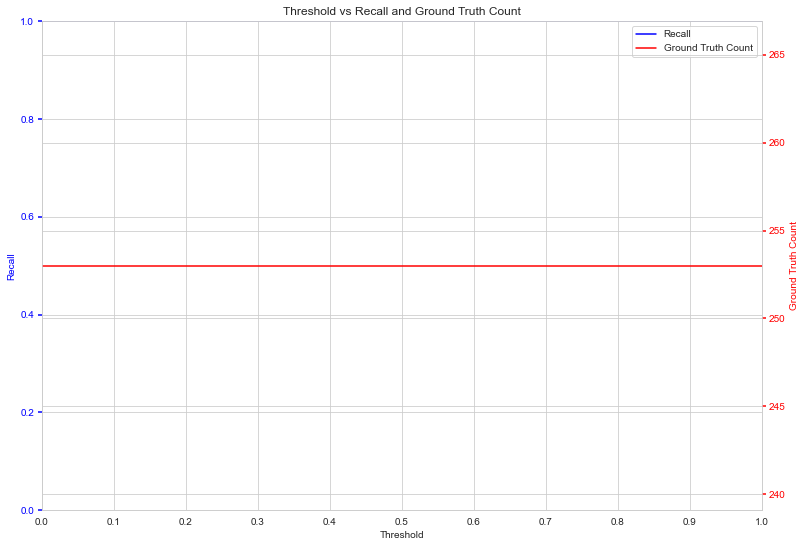

In [74]:
plot_recall_threshold_ground_truth(recall, ground_truth_count)

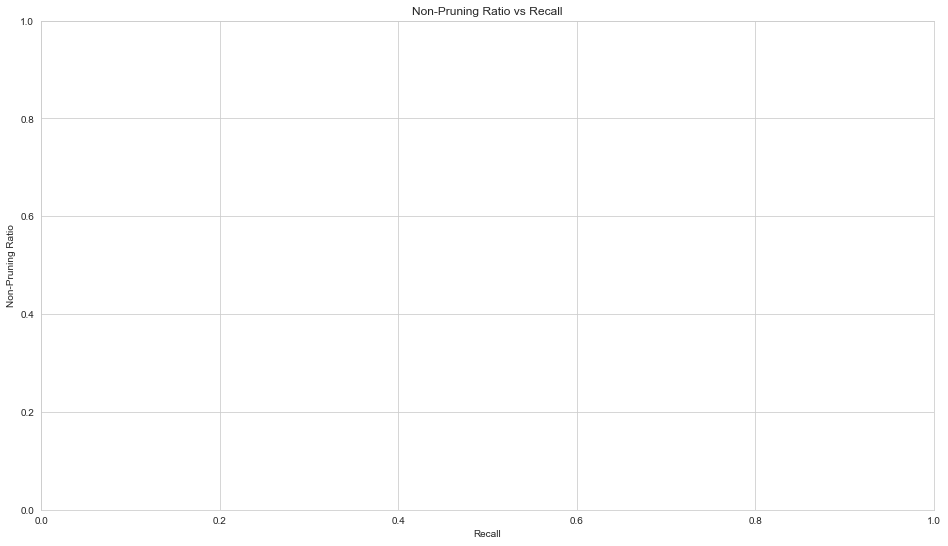

In [75]:
plot_ratio_recall(ratio, recall)

In [72]:
df_prune.to_csv(r'../../Data/data_pruned.csv', index = True)